In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tmp = pickle.load(open("0306-currency adjusted rebalance record.out", "rb"))
nominal_price_result = tmp[0]
actual_price_result = tmp[1]

In [3]:
df_list = pickle.load(open("0306-adjusted market prices.out", "rb"))
df_list[0]

,Date,Open,High,Low,Price,Vol,Change,FX Change,Cum FX Change,Actual Price
0,2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100.0,-0.020510,-0.0046,0.995400,47298.421800
1,2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300.0,0.010186,0.0024,0.997789,47894.867869
2,2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800.0,0.030458,0.0062,1.003975,49659.627868
3,2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900.0,0.009704,0.0075,1.011505,50517.597508
4,2015-01-09,49955.0,49955.0,48501.0,48840.0,2999200.0,-0.022085,0.0125,1.024149,50019.431263
5,2015-01-12,48840.0,48840.0,47956.0,48140.0,3246100.0,-0.014333,-0.0163,1.007455,48498.895857
6,2015-01-13,48144.0,48939.0,48042.0,48042.0,3881600.0,-0.002036,0.0118,1.019343,48971.287192
7,2015-01-14,48038.0,48281.0,47372.0,47646.0,3697200.0,-0.008243,0.0103,1.029842,49067.873836
8,2015-01-15,47648.0,48853.0,47648.0,48026.0,4463600.0,0.007975,-0.0099,1.019647,48969.567752
9,2015-01-16,48028.0,49264.0,48028.0,49017.0,3344900.0,0.020635,0.0079,1.027702,50374.880248


In [4]:
nominal_price_result

[[{'Date': Timestamp('2015-01-05 00:00:00'),
   'Record': [{'Asset': '^BVSP',
     'Number': 2.1045099648546834,
     'Price': 47517.0,
     'Net Value': 100000.0,
     'Delta Number': 2.1045099648546834},
    {'Asset': '^TWII',
     'Number': 10.782745164625332,
     'Price': 9274.076172,
     'Net Value': 100000.0,
     'Delta Number': 10.782745164625332},
    {'Asset': '^IXIC',
     'Number': 21.49349795550752,
     'Price': 4652.569824,
     'Net Value': 100000.0,
     'Delta Number': 21.49349795550752}]},
  {'Date': Timestamp('2016-01-04 00:00:00'),
   'Record': [{'Asset': '^BVSP',
     'Number': 2.227160955871705,
     'Price': 42141.0,
     'Net Value': 93854.78984138952,
     'Delta Number': 0.12265099101702148},
    {'Asset': '^TWII',
     'Number': 11.566692263075486,
     'Price': 8114.229004000001,
     'Net Value': 93854.78984138952,
     'Delta Number': 0.7839470984501542},
    {'Asset': '^IXIC',
     'Number': 19.14196819302451,
     'Price': 4903.089844,
     'Net Value

In [5]:
actual_price_result

[[{'Date': Timestamp('2015-01-05 00:00:00'),
   'Record': [{'Asset': '^BVSP',
     'Number': 2.1142354479150933,
     'Price': 47298.4218,
     'Net Value': 100000.0,
     'Delta Number': 2.1142354479150933},
    {'Asset': '^TWII',
     'Number': 10.781397910903255,
     'Price': 9275.235069366074,
     'Net Value': 100000.0,
     'Delta Number': 10.781397910903255},
    {'Asset': '^IXIC',
     'Number': 21.49349795550752,
     'Price': 4652.569824,
     'Net Value': 100000.0,
     'Delta Number': 21.49349795550752}]},
  {'Date': Timestamp('2016-01-04 00:00:00'),
   'Record': [{'Asset': '^BVSP',
     'Number': 2.936639063167109,
     'Price': 28673.739472067584,
     'Net Value': 84204.4234207503,
     'Delta Number': 0.8224036152520156},
    {'Asset': '^TWII',
     'Number': 10.46841271825419,
     'Price': 8049.305366552161,
     'Net Value': 84263.45067232635,
     'Delta Number': -0.3129851926490659},
    {'Asset': '^IXIC',
     'Number': 17.185785566511914,
     'Price': 4903.0898

In [6]:
nominal_plot_data_list = []
actual_plot_data_list = []

# for balance_freq in range(4):
for balance_freq in [1]:
    nominal = nominal_price_result[balance_freq]
    date_df = pd.DataFrame([tmp['Date']for tmp in nominal], columns = ['Date']) # Action dates in the five years
    nominal_df_list = []
    
    for i in range(3):
        asset_df = pd.DataFrame([tmp['Record'][i] for tmp in nominal])
        result_df = pd.concat([date_df, asset_df], axis=1)
        result_df.rename(columns={'0':'Date'}, inplace=True)
        nominal_df_list.append(result_df)
        
    
    actual = actual_price_result[balance_freq]
    date_df = pd.DataFrame([tmp['Date']for tmp in actual], columns = ['Date'])
    actual_df_list = []
    
    for i in range(3):
        asset_df = pd.DataFrame([tmp['Record'][i] for tmp in actual])
        result_df = pd.concat([date_df, asset_df], axis=1)
        result_df.rename(columns={'0':'Date'}, inplace=True)
        actual_df_list.append(result_df)

        
    for market_num in range(len(actual_df_list)):
        tmp_trans_df = actual_df_list[market_num]
        trans_date = tmp_trans_df['Date']
        start_date = list(trans_date)[0]
        end_date = list(df_list[0]['Date'])[-1]

        history_df = df_list[market_num]
        all_price_date = history_df['Date'][(history_df['Date']>=start_date) & (history_df['Date']<= end_date)]
        plot_data = []
        number = 0
        net_value = 0
        price = 0
        for date in all_price_date:
            if (trans_date == date).any(): # If rebalanced at that day:
                number = tmp_trans_df['Number'][tmp_trans_df['Date']==date].values[0]
                net_value = tmp_trans_df['Net Value'][tmp_trans_df['Date']==date].values[0]
                price = tmp_trans_df['Price'][tmp_trans_df['Date']==date].values[0]
            else:
                price = history_df['Actual Price'][history_df['Date']==date].values[0]
                net_value = number*price
            plot_data.append({
                "Date": date,
                "Number": number,
                "Price": price,
                "Net Value": net_value
            })
        actual_plot_data_list.append(plot_data)
        
        
    for market_num in range(len(nominal_df_list)):
        tmp_trans_df = nominal_df_list[market_num]
        trans_date = tmp_trans_df['Date']
        start_date = list(trans_date)[0]
        end_date = list(df_list[0]['Date'])[-1]

        history_df = df_list[market_num]
        all_price_date = history_df['Date'][(history_df['Date']>=start_date) & (history_df['Date']<= end_date)]
        plot_data = []
        number = 0
        net_value = 0
        price = 0
        for date in all_price_date:
            if (trans_date == date).any(): # If rebalanced at that day:
                number = tmp_trans_df['Number'][tmp_trans_df['Date']==date].values[0]
                net_value = tmp_trans_df['Net Value'][tmp_trans_df['Date']==date].values[0]
                price = tmp_trans_df['Price'][tmp_trans_df['Date']==date].values[0]
            else:
                price = history_df['Actual Price'][history_df['Date']==date].values[0]
                net_value = number*price
            plot_data.append({
                "Date": date,
                "Number": number,
                "Price": price,
                "Net Value": net_value
            })
        nominal_plot_data_list.append(plot_data)


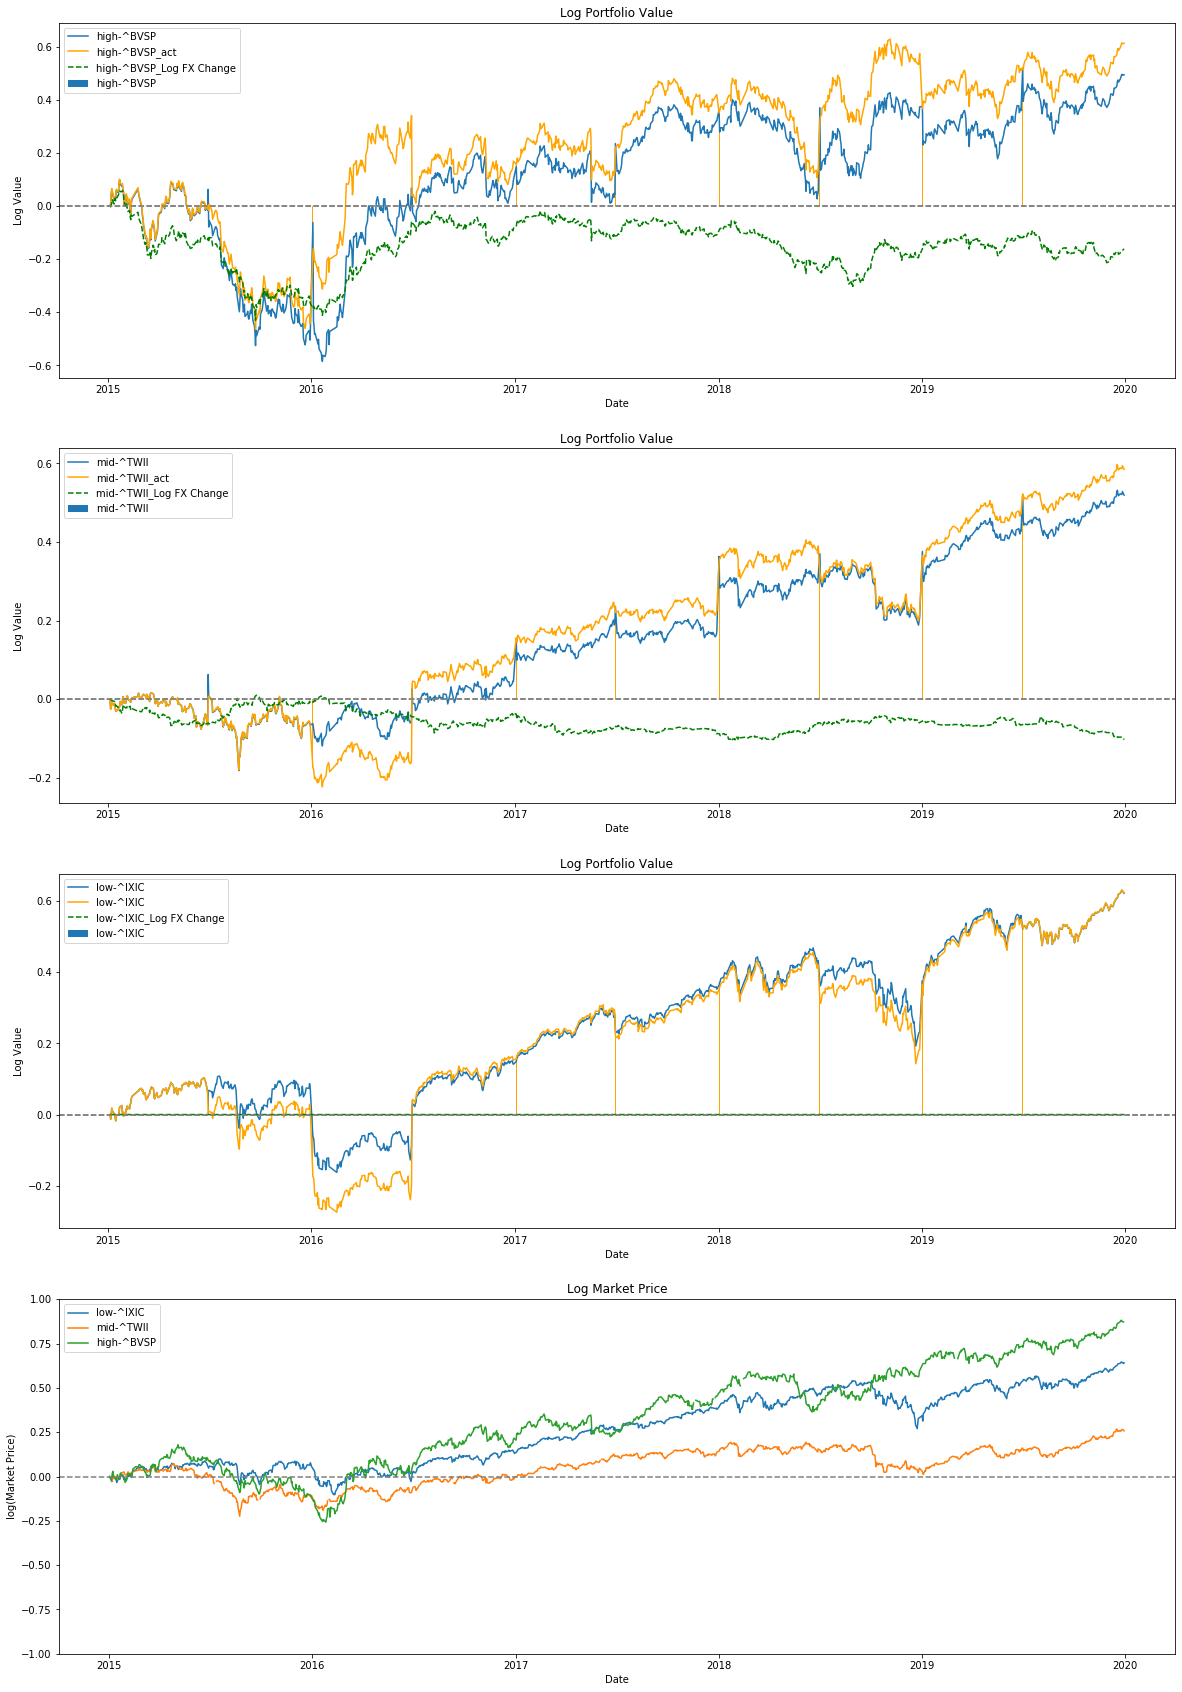

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from CSVUtils import *

DIR = "./from github/Stock-Trading-Environment/data"
file_names = ["^BVSP", "^TWII", "^IXIC"]
source_list = ["yahoo", "yahoo", "yahoo"]

nominal_labels = ["high-^BVSP", "mid-^TWII", "low-^IXIC"]
actual_labels = ["high-^BVSP_act", "mid-^TWII_act", "low-^IXIC"]


plt.rcParams['figure.facecolor'] = 'white'
fig=plt.figure(figsize=(20,30))
axs = []
gs=GridSpec(4,1) # 5 rows, 1 columns
axs.append(fig.add_subplot(gs[0,0])) # First row, first column
axs.append(fig.add_subplot(gs[1,0])) # First row, second column
axs.append(fig.add_subplot(gs[2,0])) # First row, third column
axs.append(fig.add_subplot(gs[3:,:])) # Second row, span all columns



for i, plot_data in enumerate(nominal_plot_data_list):
    plot_data = pd.DataFrame(plot_data)
    
    axs[i].plot(plot_data['Date'], np.log(plot_data['Net Value']/plot_data['Net Value'][0]), color="C0", label = nominal_labels[i])
    axs[i].bar(nominal_df_list[i]['Date'], np.log(nominal_df_list[i]['Net Value']/nominal_df_list[i]['Net Value'][0]),width=2, label = nominal_labels[i])
    axs[i].axhline(y=0, color = "grey", linestyle='--')
#     axs[i].set_ylim((0, 300000))
    axs[i].legend()
    axs[i].set_title('Portfolio Weights')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Market Value (US$)')
    
    
for i, plot_data in enumerate(actual_plot_data_list):
    plot_data = pd.DataFrame(plot_data)
    
    axs[i].plot(plot_data['Date'], np.log(plot_data['Net Value']/plot_data['Net Value'][0]), color="orange", label = actual_labels[i])
    axs[i].bar(actual_df_list[i]['Date'], np.log(actual_df_list[i]['Net Value']/actual_df_list[i]['Net Value'][0]),width=2, color="orange")
    axs[i].plot(df_list[i]['Date'], np.log(df_list[i]['Cum FX Change']),color="green",linestyle='--',label = nominal_labels[i]+"_Log FX Change")
    axs[i].axhline(y=0, color = "grey", linestyle='--')
#     axs[i].set_ylim((0, 300000))
    axs[i].legend()
    axs[i].set_title('Log Portfolio Value')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Log Value')
    
    
    
for i in range(2,-1,-1): # Inverse: Low-Mid-High
    df = csv2df(DIR, file_names[i]+".csv",source = source_list[i])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date']>=pd.to_datetime("2015-01-01"))&(df['Date']<=pd.to_datetime("2019-12-31"))].reset_index(drop=True)

    j = 0
    init_price = df['Price'][j]
    while np.isnan(init_price):
        j+=1
        init_price = df['Price'][j]
    y = np.log(df['Price'][j:] / init_price)
    x = df['Date'][j:]
    axs[3].plot(x,y,label = nominal_labels[i])

axs[3].axhline(y=0, color = "grey", linestyle='--')
axs[3].set_ylim((-1,1))
axs[3].legend()
axs[3].set_title('Log Market Price')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('log(Market Price)')
plt.show()

In [9]:
nominal = nominal_price_result[3]
date_df = pd.DataFrame([tmp['Date']for tmp in nominal], columns = ['Date'])
nominal_df_list = []
for i in range(3):
    asset_df = pd.DataFrame([tmp['Record'][i] for tmp in nominal])
    result_df = pd.concat([date_df, asset_df], axis=1)
    result_df.rename(columns={'0':'Date'}, inplace=True)
    nominal_df_list.append(result_df)

In [10]:
actual = actual_price_result[3]
date_df = pd.DataFrame([tmp['Date']for tmp in actual], columns = ['Date'])
actual_df_list = []
for i in range(3):
    asset_df = pd.DataFrame([tmp['Record'][i] for tmp in actual])
    result_df = pd.concat([date_df, asset_df], axis=1)
    result_df.rename(columns={'0':'Date'}, inplace=True)
    actual_df_list.append(result_df)

In [24]:
tmp_trans_df = actual_df_list[1]
trans_date = tmp_trans_df['Date']
start_date = list(trans_date)[0]
end_date = list(trans_date)[-1]

history_df = df_list[1]
all_price_date = history_df['Date'][(history_df['Date']>=start_date) & (history_df['Date']<= end_date)]
plot_data = []
number = 0
net_value = 0
price = 0
for date in all_price_date:
    if (trans_date == date).any(): # If rebalanced at that day:
        number = tmp_trans_df['Number'][tmp_trans_df['Date']==date].values[0]
        net_value = tmp_trans_df['Net Value'][tmp_trans_df['Date']==date].values[0]
        price = tmp_trans_df['Price'][tmp_trans_df['Date']==date].values[0]
    else:
        price = history_df['Actual Price'][history_df['Date']==date].values[0]
        net_value = number*price
    plot_data.append({
        "Date": date,
        "Number": number,
        "Price": price,
        "Net Value": net_value
    })

In [25]:
plot_data = pd.DataFrame(plot_data)

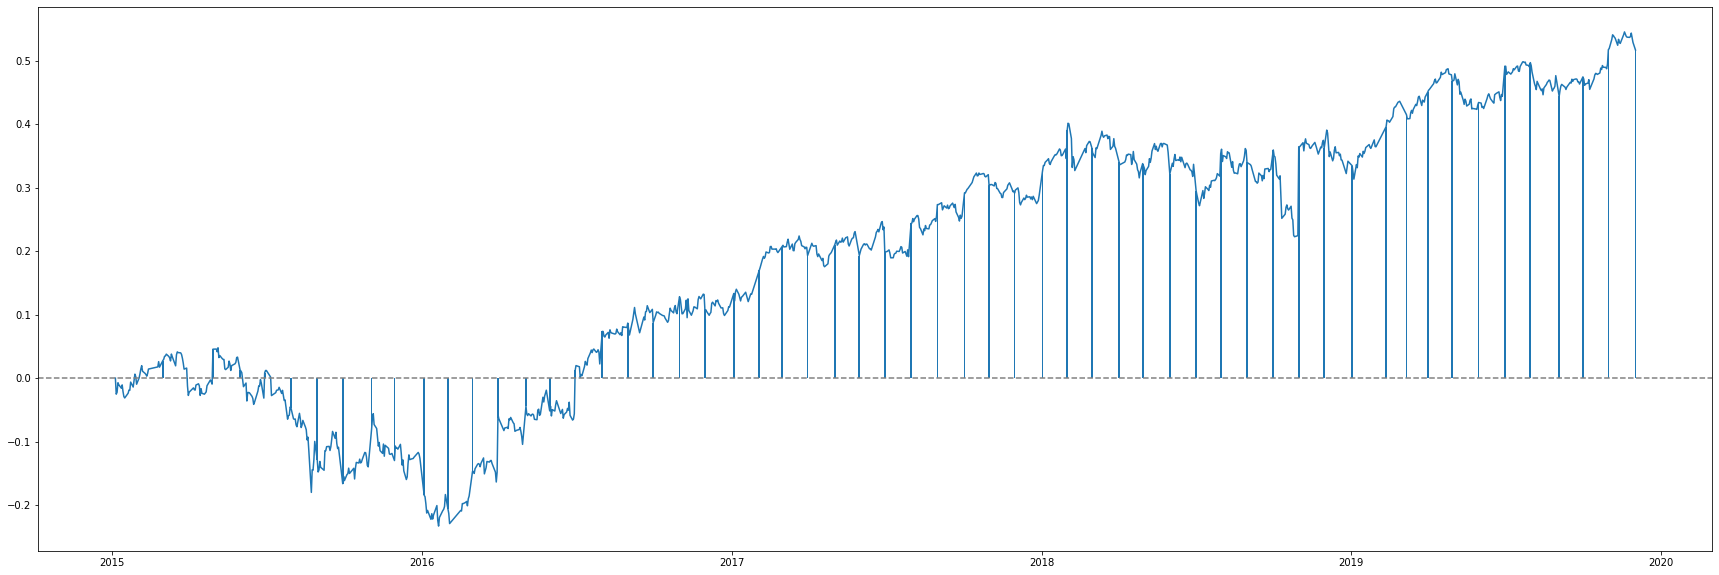

In [26]:
plt.figure(figsize=(30,10))
plt.plot(plot_data['Date'], np.log(plot_data['Net Value']/plot_data['Net Value'][0]))
plt.bar(actual_df_list[1]['Date'], np.log(actual_df_list[1]['Net Value']/actual_df_list[1]['Net Value'][0]),width=2)
plt.axhline(y=0, color = "grey", linestyle='--')

In [89]:
tmp_trans_df['Number'][tmp_trans_df['Date']==all_price_date[0]].values[0]

10.781397910903255

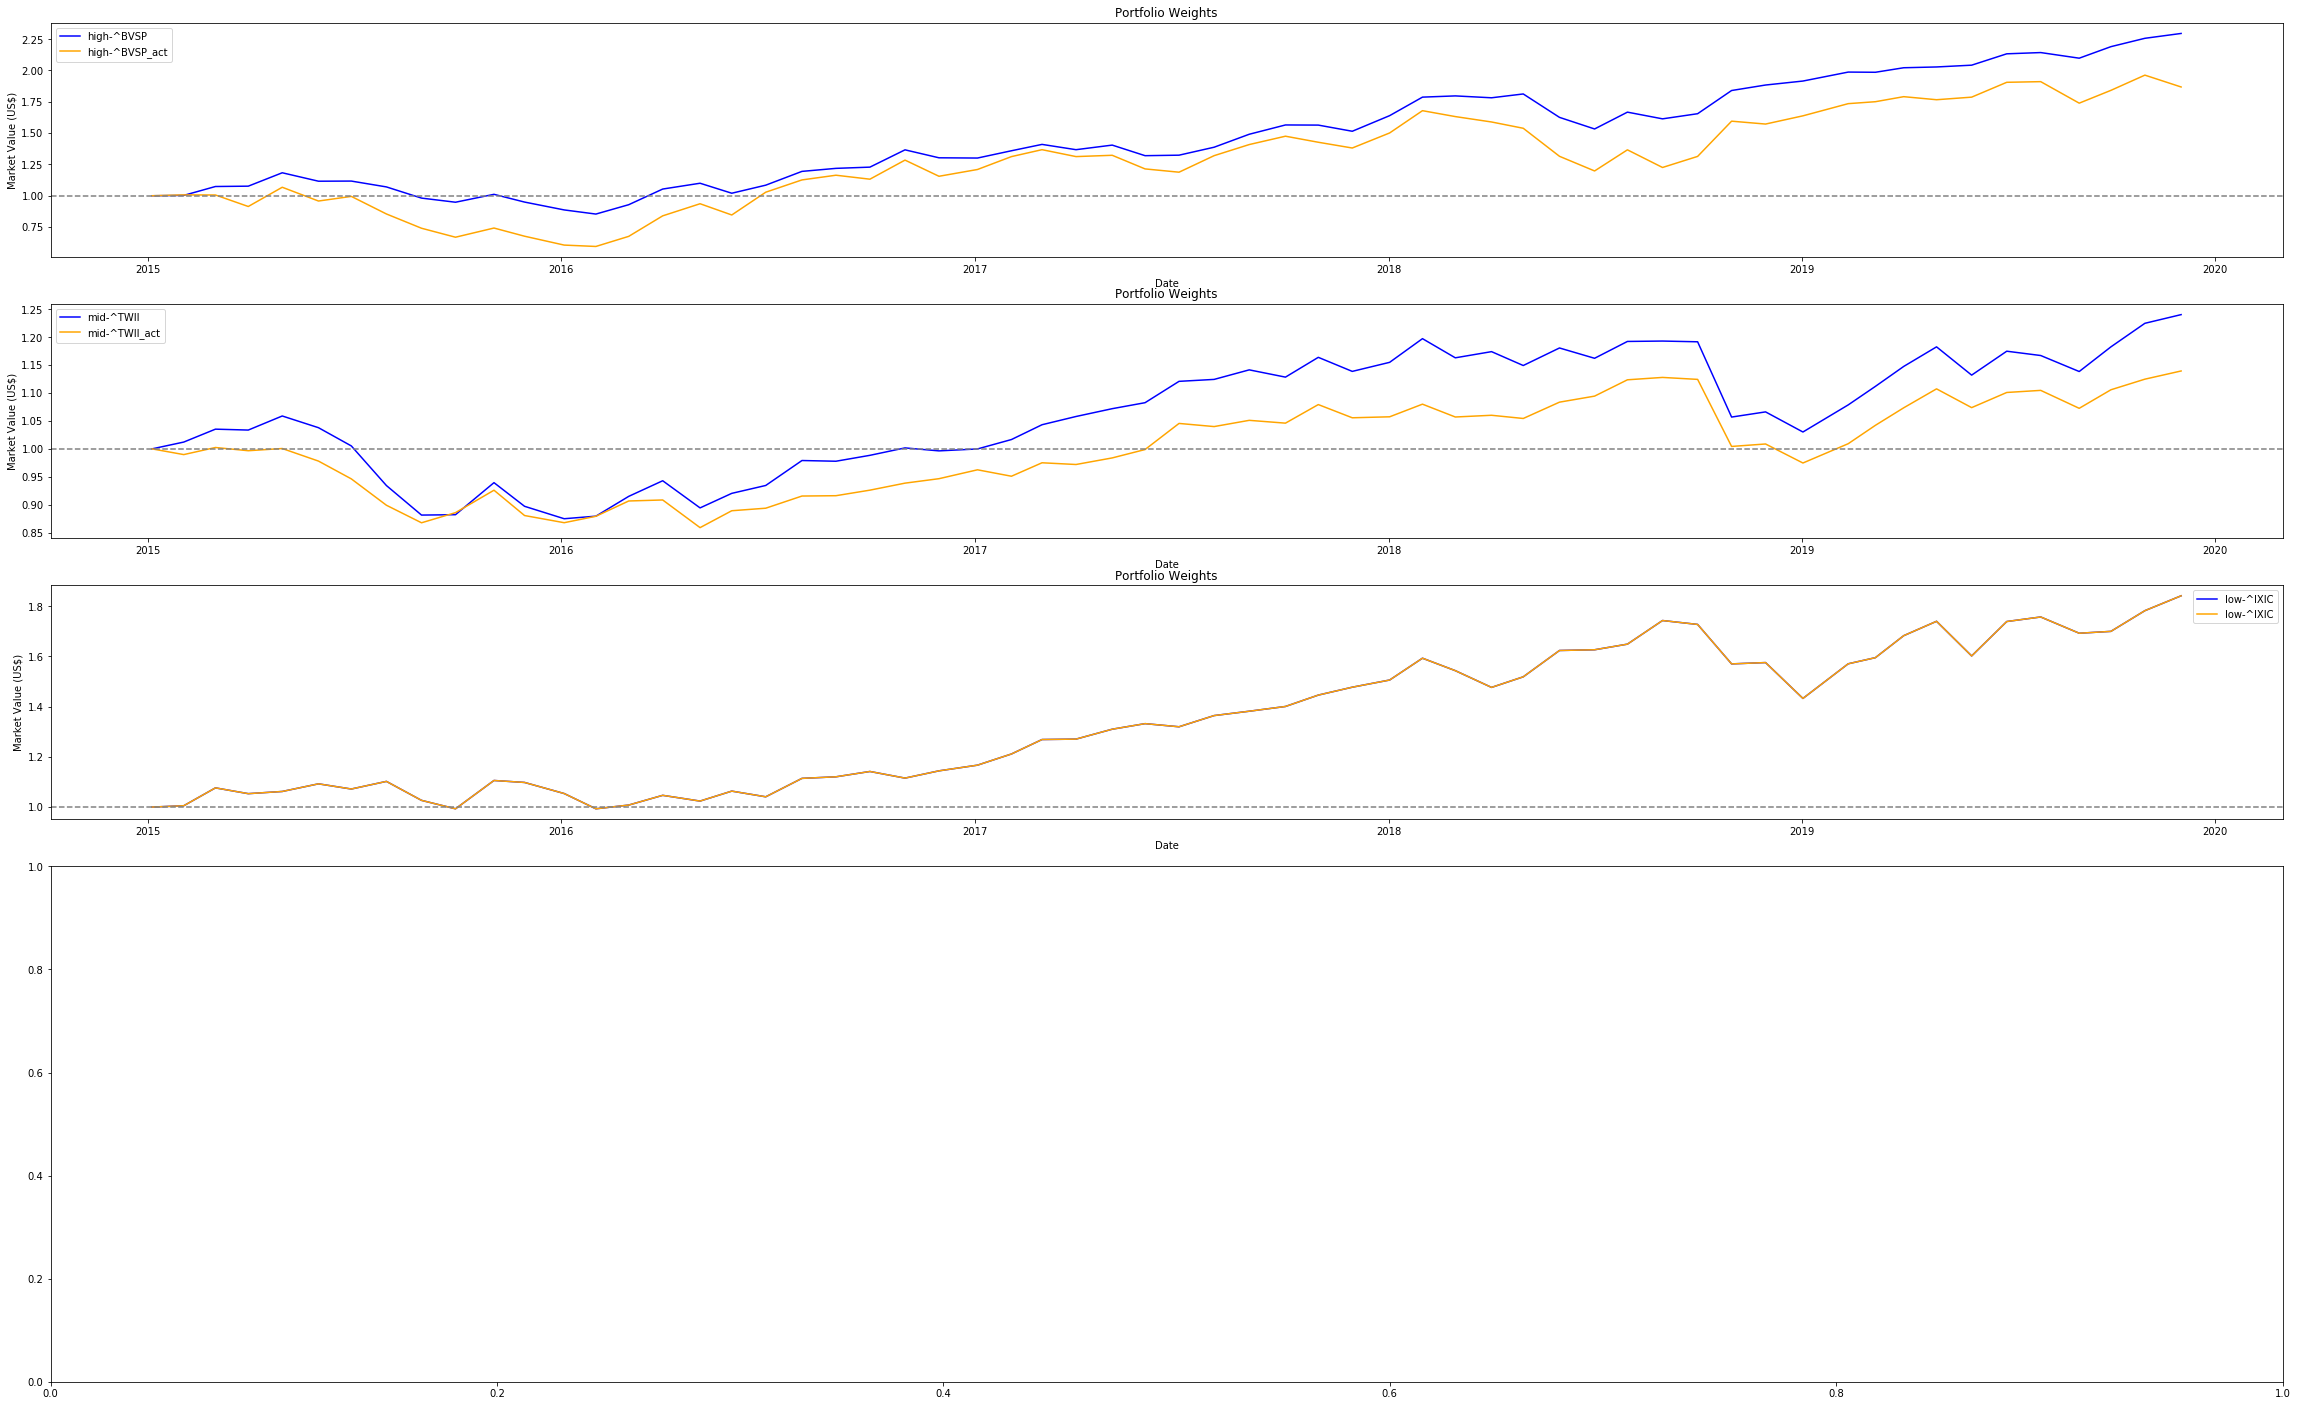

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec


nominal_labels = ["high-^BVSP", "mid-^TWII", "low-^IXIC"]
actual_labels = ["high-^BVSP_act", "mid-^TWII_act", "low-^IXIC"]

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
fig=plt.figure(figsize=(40,25))
axs = []
gs=GridSpec(5,1) # 5 rows, 1 columns
axs.append(fig.add_subplot(gs[0,0])) # First row, first column
axs.append(fig.add_subplot(gs[1,0])) # First row, second column
axs.append(fig.add_subplot(gs[2,0])) # First row, third column
axs.append(fig.add_subplot(gs[3:,:])) # Second row, span all columns


for i in range(3):
    axs[i].plot(nominal_df_list[i]['Date'], nominal_df_list[i]['Price']/nominal_df_list[i]['Price'][0], color = "blue", label = nominal_labels[i])
    axs[i].plot(actual_df_list[i]['Date'], actual_df_list[i]['Price']/actual_df_list[i]['Price'][0], color = "orange", label = actual_labels[i])
    axs[i].axhline(y=1, color = "grey", linestyle='--')
#     axs[i].set_ylim((0, 300000))
    axs[i].legend()
    axs[i].set_title('Portfolio Weights')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Market Value (US$)')